In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt_kwargs = {'figsize': (10, 4)}

# Первый датасет

   Первый датасет представляет собой информацию по каткам в игре CS:GO. Я в нее переодически играю, потому решила поискать датасеты по этой теме.

In [5]:
weapon_events = pd.read_csv(r'C:\Users\surkova.ea\Desktop\mm_master_demos.csv', index_col=0)
weapon_events['round_type'].value_counts()
weapon_events.head()

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8482,133.0582,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198123082770,17,1473.847,1351.358,662.170,772.748,PISTOL_ROUND,2950,3850,16.0
1,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8600,134.9023,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,PISTOL_ROUND,2950,3850,16.0
2,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8610,135.0586,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,PISTOL_ROUND,2950,3850,16.0
3,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8624,135.2774,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,PISTOL_ROUND,2950,3850,16.0
4,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8632,135.4024,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,PISTOL_ROUND,2950,3850,16.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Team Round Spend Values')

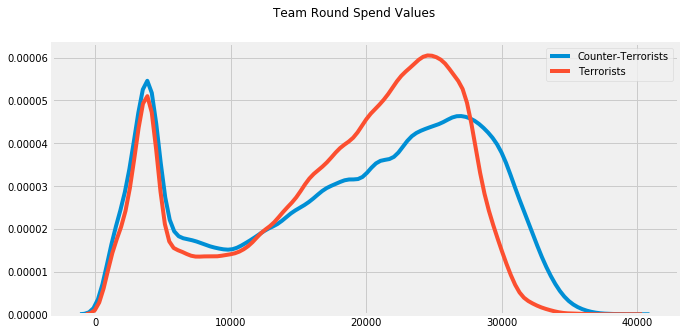

In [4]:
fig = plt.figure(figsize=(10, 5))
sns.kdeplot(weapon_events['ct_eq_val'].rename('Counter-Terrorists')) #Общая стоимость экипировки контртеррористической команды
sns.kdeplot(weapon_events['t_eq_val'].rename('Terrorists')) #Общая стоимость экипировки террористической команды
plt.suptitle("Team Round Spend Values")

Из этого графика можно увидеть, что игроки предпочитают закупать либо дешевую экипировку, либо дорогую. Экипировка средней стоимости не привлекательна для игроков. 
Зачем мне это знать? Затем, что стратегии игры у команд напрямую связаны с расходом заработанной за раунды внутриигровой валюты. Стратегии обычно две - "экономим до лучших времен" и "all-in, дамы и господа". И вот этот график лишний раз это подтвердил.

Теперь я хочу увидеть, на что же именно тратят свои деньги игроки.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


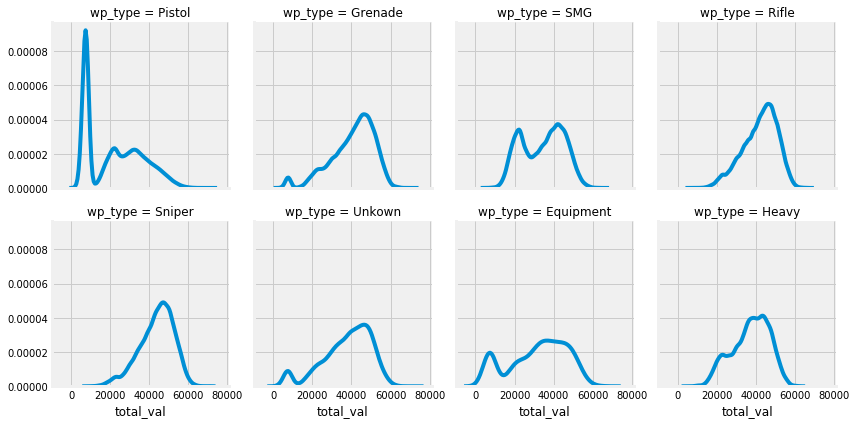

In [9]:
g = sns.FacetGrid(weapon_events.assign(
    total_val=weapon_events['ct_eq_val'] + weapon_events['t_eq_val']
), col="wp_type", col_wrap=4)
g.map(sns.kdeplot, 'total_val')

Естественно, всплекс трат на пистолеты обусловлен тем, что первые раунды всегда катаются на дешевом оружии, коим и является пистолет. 
Также можно увидеть, что средний пик трат (не считая пистолетов) приходится на сумму 50 тысяч долларов, что означает траты примерно по 10 тысяч долларов на одного игрока команды.  
И опять же можно наблюдать особенность, которую мы выявили в первом графике - команды либо ничего не тратят на оружие (используя лишь дешевые пистолеты), либо тратят сразу много денег на другие типы оружия. Принципа "средней цены" никто не придерживается. 

# Второй датасет

Волею судеб я нашла датасет с данными по землетрясениям в Турции аж с 1910 года по 2017 года. 
Вот и посмотрим, что эти данные нам скажут :)

In [10]:
earthquake = pd.read_csv(r'C:\Users\surkova.ea\Desktop\earthquake.csv')
earthquake.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [13]:
def year(x):
    return x[0:4]
earthquake['year'] = earthquake.date.apply(year)
earthquake['year'] = earthquake.year.astype(int)
print(earthquake.year.dtypes)
earthquake.head()

int32


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,year
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,2003
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,2007
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1978
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,1997
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,2000


Теперь узнаем, в каком году было больше всего землетрясений в Турции.

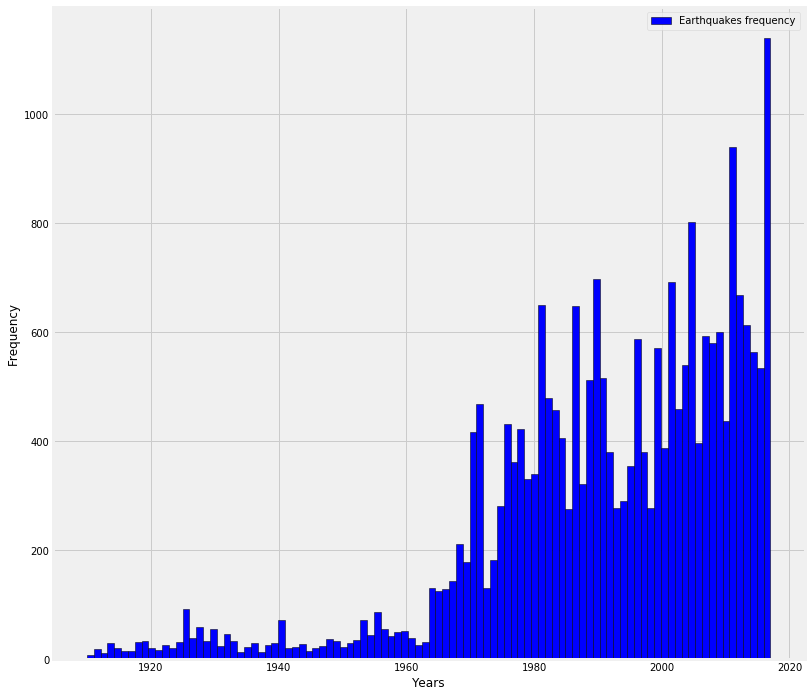

In [16]:
earthquake.year.plot(kind = 'hist' , color = 'blue' , edgecolor='black', bins = 100 , figsize = (12,12) , label = 'Earthquakes frequency')
plt.legend(loc = 'upper right')
plt.xlabel('Years')
plt.show()

Как можно видеть, после 60х годов прошлого века пошел резкий рост количества землетрясений. Думаю, в первую очередь это связано с тем, что эти землетрясения стали лучше улавливать при помощи различных техник, а также регистрировать. 

# Третий датасет
Я люблю кофе, а тут и датасет пищевой ценности напитков Starbucks на мою голову.

In [21]:
starbucks = pd.read_csv(r'C:\Users\surkova.ea\Desktop\starbucks_drinkMenu_expanded.csv')
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


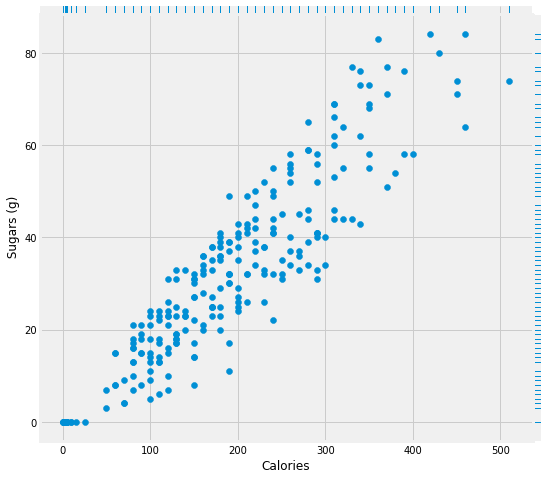

In [25]:
calories = starbucks.Calories
sugar = starbucks[' Sugars (g)']
grid = sns.JointGrid(calories, sugar, height=8, ratio=50)
grid.plot_joint(plt.scatter)
grid.plot_marginals(sns.rugplot, height=2)

Итак, по этому графику мы можем судить, что количество сахара пропорционально связано с количеством калорий, что логично. Хех, а была надежда...

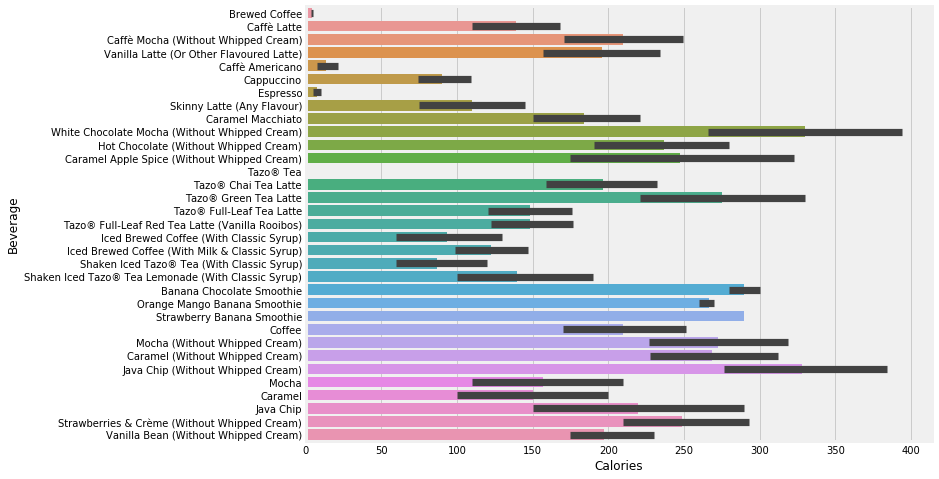

In [29]:
plt.figure(figsize=(10,8))
bar_cal = sns.barplot(x='Calories', y='Beverage', data=starbucks)

А вот и схема калорийности напитков, из которой следует, что карамельное маккиато и некий Java Chip - это зло, а всем худеющим надо переходить на эспрессо, американо и чай.  ¯\_(ツ)_/¯